In [71]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset from sklearn
df = pd.read_csv(r'/content/diabetes.csv')

# Display the first few rows of the dataset
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [74]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
log_reg_cr = classification_report(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {log_reg_accuracy:.2f}')
print('Confusion Matrix:')
print(log_reg_cm)
print('Classification Report:')
print(log_reg_cr)


Logistic Regression Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [77]:
# Make predictions with Random Forest Classifier
y_pred_rf_clf = rf_clf.predict(X_test_scaled)

# Evaluate the Random Forest Classifier model
rf_clf_accuracy = accuracy_score(y_test, y_pred_rf_clf)
rf_clf_cm = confusion_matrix(y_test, y_pred_rf_clf)
rf_clf_cr = classification_report(y_test, y_pred_rf_clf)

print(f'Random Forest Classifier Accuracy: {rf_clf_accuracy:.2f}')
print('Confusion Matrix:')
print(rf_clf_cm)
print('Classification Report:')
print(rf_clf_cr)


Random Forest Classifier Accuracy: 0.72
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



                      Model  Accuracy
0       Logistic Regression  0.753247
1  Random Forest Classifier  0.720779


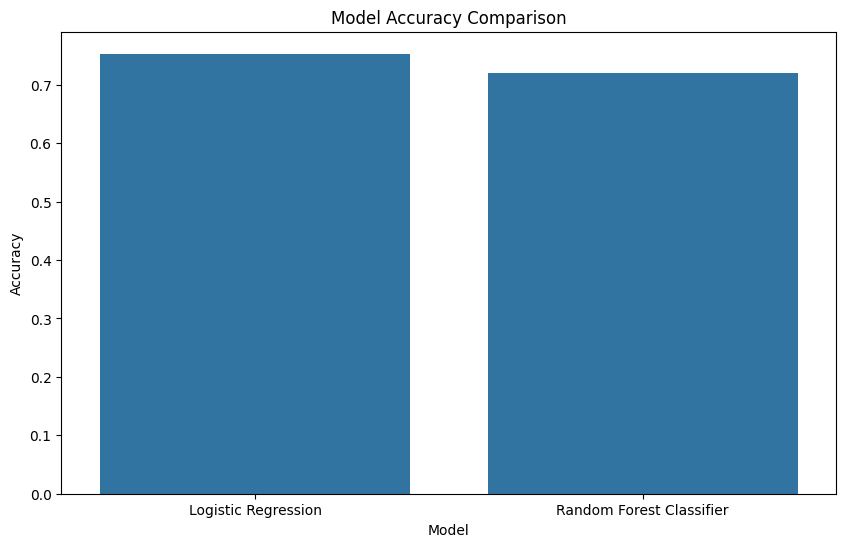

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare the accuracy of the models
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier'],
    'Accuracy': [log_reg_accuracy, rf_clf_accuracy]
})

print(models_comparison)

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models_comparison)
plt.title('Model Accuracy Comparison')
plt.show()
